In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Banana.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         3027 non-null   object 
 1   precio_venta    2992 non-null   float64
 2   peso            3027 non-null   float64
 3   t_id            3027 non-null   object 
 4   fecha_venta     3015 non-null   object 
 5   hora_venta      3015 non-null   object 
 6   tipo            3027 non-null   object 
 7   fecha_recogida  3027 non-null   object 
 8   hora_recogida   3027 non-null   object 
 9   lote            3027 non-null   object 
 10  marca           3027 non-null   object 
 11  coste_inicial   2947 non-null   float64
 12  proveedor       3027 non-null   object 
dtypes: float64(3), object(10)
memory usage: 307.6+ KB


In [ ]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   2992.000000  3027.000000    2947.000000
mean       3.493594   299.104778       1.991802
std        0.707349    98.449220       0.487783
min        1.090542   -49.678105       0.257402
25%        3.021637   231.348021       1.664987
50%        3.503050   300.085589       1.993115
75%        3.956361   365.088267       2.321922
max        6.029488   638.983500       3.702711


In [ ]:
print(df.head())

         cliente  precio_venta        peso             t_id fecha_venta  \
0  CompraMaestra      3.097605  346.595182  Banana01156.png  2022/09/21   
1  CompraMaestra      3.157035  137.504137  Banana01228.png  2022/09/21   
2  CompraMaestra      4.813136  291.272841  Banana01234.png  2022/09/21   
3  CompraMaestra      2.667349  343.989291   Banana0131.png  2022/09/04   
4  CompraMaestra      3.322952  425.906052   Banana0142.png  2022/09/25   

  hora_venta    tipo fecha_recogida hora_recogida                    lote  \
0      15:00  Banana     2022/09/21         09:00  H65T65T65L49M53R46V78M   
1      02:00  Banana     2022/09/20         22:00  H65T65T65L49N50T46V78M   
2      22:00  Banana     2022/09/21         14:00  H65T65T65L49N51P46V78M   
3      23:00  Banana     2022/09/04         16:00   H65T65T65L49O49J80T71   
4      19:00  Banana     2022/09/25         03:00   H65T65T65L49P50J80T71   

            marca  coste_inicial                   proveedor  
0     JugosoAroma      

In [ ]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

# **PESO**

Empezamos analizando los PESOS

In [ ]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -49.67810465027532
Peso máximo: 638.9834995406296
Total negativos: 6
Total nulos: 0


In [ ]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
AromasCelestiales,1
AventuraFrutal,1
GourmetFrutas,1
DeliciaNaturaleza,1
FrutaDulce,1
SinfoníaDelicias,1


In [ ]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
Apícola EcoMiel,2
EcoRiego Soluciones,1
Mallas AgroProtección García,1
Agronutrientes del Futuro,1
Pecuaria Moderna Alcaraz,1


In [ ]:
df[df["peso"] < 0]["lote"].unique()

array(['H65T65T65L50U50P46V78M', 'H65T65T65L54O52J80T71',
       'H65T65T65L54T48J80T71', 'H65T65T65L49N48U46V78M',
       'H65T65T65L50Q55M46V78M', 'H65T65T65L51U50J80T71'], dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero no es así, en cambio si que resultan ser los lotes que empiezan en: H65T65T65L.

In [ ]:
print(negativos["peso"])

850     -3.176638
1069   -32.162584
1359   -49.678105
2189    -1.912791
2668    -2.294806
2924    -1.226825
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo. No encontramos sentido a bananas de 1, 2 o 3 gramos.

In [ ]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                     cliente  precio_venta       peso             t_id  \
850         Almacén Estrella      3.107149  -3.176638  Banana02924.png   
1069       La Ruta del Sabor      2.741667 -32.162584   Banana0634.png   
1359   EcoMercado Sostenible      2.659302 -49.678105   Banana0680.png   
2189  Distribuidora Nacional      4.091262  -1.912791  Banana01209.png   
2668        SuperValle Verde      4.502893  -2.294806  Banana02571.png   
2924       Alimentos Premium      4.422825  -1.226825   Banana0392.png   

     fecha_venta hora_venta    tipo fecha_recogida hora_recogida  \
850   2022/09/20      00:00  Banana     2022/09/19         16:00   
1069  2022/09/04      17:00  Banana     2022/09/04         10:00   
1359  2022/09/20      01:00  Banana     2022/09/20         00:00   
2189  2022/09/28      14:00  Banana     2022/09/28         07:00   
2668  2022/09/24      17:00  Banana     2022/09/24         10:00   
2924  2022/09/18      09:00  Banana     2022/09/18         05:00   

    

Reemplazamos todos los valores negativos por NaN


In [ ]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [ ]:
print("Cantidad de pesos mayores de 365 g:", len(df[df['peso'] > 365]))
print("Peso máximo:", df.loc[df['peso'] > 450, 'peso'].max())

Cantidad de pesos mayores de 365 g: 758
Peso máximo: 638.9834995406296


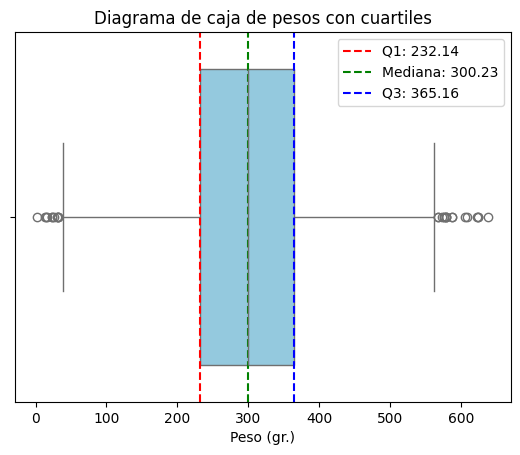

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["peso"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de pesos con cuartiles')
plt.xlabel('Peso (gr.)')
plt.legend()

plt.show()

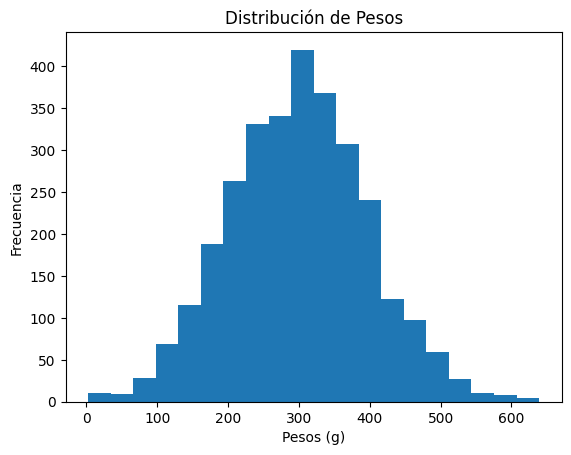

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 16
232.14023904798395
365.1596303537521
133.01939130576815


In [ ]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

            peso             t_id
1935    2.515046  Banana02027.png
1747   12.694916  Banana02195.png
2686   14.876500   Banana0430.png
843    15.626093   Banana0265.png
696    23.086488   Banana0635.png
...          ...              ...
1488  609.544879  Banana02079.png
6     623.599230  Banana01513.png
1690  624.199161  Banana02984.png
521   624.634118     Banana01.png
1947  638.983500  Banana02385.png

[3021 rows x 2 columns]


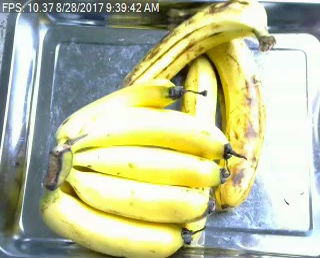

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Banana/Banana02027.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

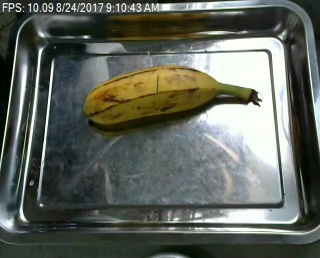

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Banana/Banana01.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

Aqui vemos cono una imagen con varias bananas nos da un peso de 2.51gr, mientras que una sola banana de apariencia más pequeña nos da un peso de 624.6 gr.
Comprobamos más imagenes para comprobar que los pesos no están bien tomados y vemos:
1. En varias imagenes los pesos están tomados con manos en las imagenes lo que sugiere que pueden estar alterados.
2. 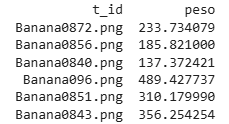
Todas estas imagenes muestran una sola banana y tienen un peso más elevado que otras que muestran varias y tienen pesos mucho más bajos.
3. 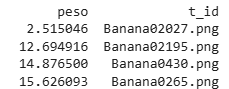
Todas estas imagenes muestran más de una banana mientras que sus pesos son los más bajos que hay en los datos.

Creemos que los pesos no están tomados de manera correcta o se han alterado la información de estos al incluirlos en la base de datos. Encomntrar bananas con 2gr, 12 gr, 14gr... y ver que incluyen varias unidades mientras que en otras imagenes vemos solamente una banana y nos dan pesos de   489gr, 356gr, 310gr...

Dejamos los pesos aquí y veremos más adelante. Empiezamos con coste inicial.

# **COSTE INICIAL**

In [ ]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.2574023844217985
Coste inicial máximo: 3.702711449584575
Coste inicial negativos: 0
Coste inicial nulos: 80


No encontramos negativos y los costes iniciales van desde los 0.25 hasta los 3.70


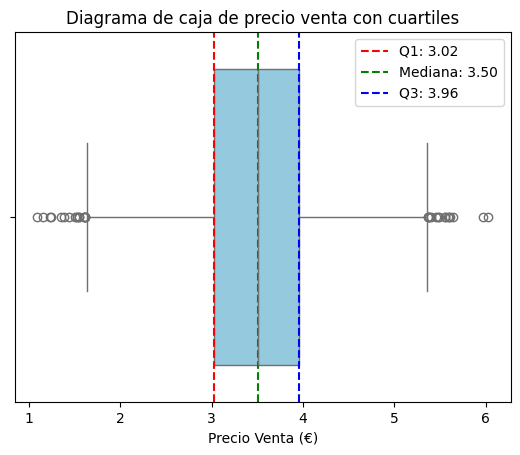

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

En el gráfico se ven menos outliers que en otras frutas. Vamos a ver en otro gráfico como visualizamos los datos.

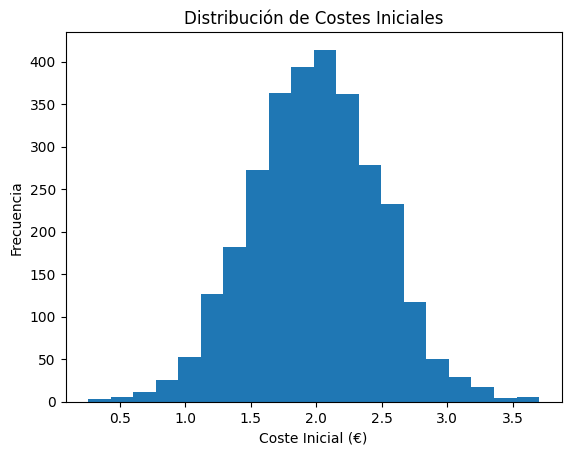

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 12
1.6649870426730926
2.321922297446389
0.6569352547732965


Una vez analizados los costes iniciales y viendo que tenemos 12 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [ ]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 1.090542208605351
Precio venta máximo: 6.02948843777906
Total negativos: 0
Total nulos: 35


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [ ]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor


Ninguno de los 35 nulos es un producto dañado y no ha sido vendido. En este caso han sufrido una perdida de información o esta información no ha sido registrada correctamente.

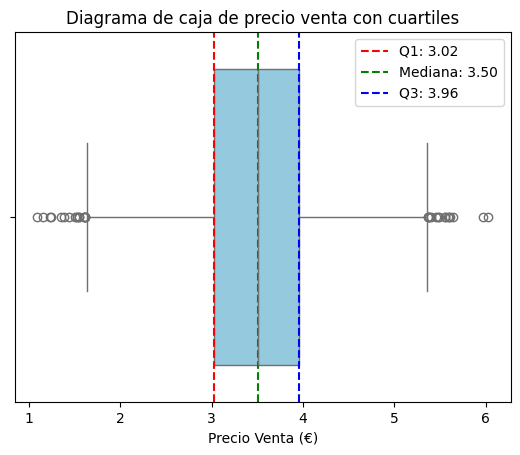

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

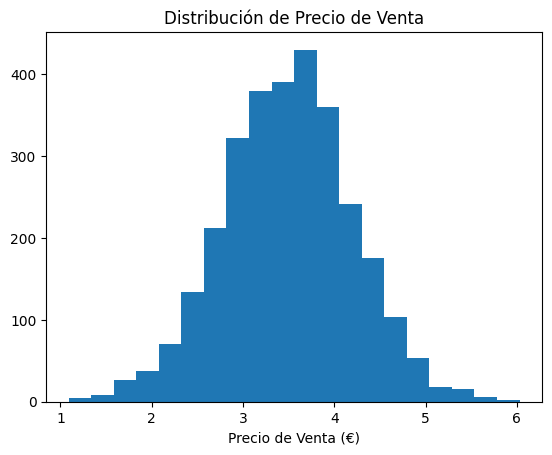

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [ ]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)
print(IQR_pv)

Total outliers: 16
3.021637123724683
3.9563609599186904
0.9347238361940073


In [ ]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y
0,Tienda Selecta,6.029488,322.579380,Banana0285.png,2022/09/14,03:00,Banana,2022/09/13,21:00,H65T65T65L50T53J80T71,...,322.579380,2022/09/14,03:00,Banana,2022/09/13,21:00,H65T65T65L50T53J80T71,DeliciosoEdén,3.429994,EcoRiego Soluciones
1,El Bazar de la Comida,5.602866,365.272852,Banana02802.png,2022/09/10,01:00,Banana,2022/09/09,17:00,H65T65T65L50T48N46V78M,...,365.272852,2022/09/10,01:00,Banana,2022/09/09,17:00,H65T65T65L50T48N46V78M,PaladarDorado,3.702711,AgroSuministros del Campo
2,Delicias del Campo,5.556277,383.678296,Banana0741.png,2022/09/07,12:00,Banana,2022/09/07,06:00,H65T65T65L55P49J80T71,...,383.678296,2022/09/07,12:00,Banana,2022/09/07,06:00,H65T65T65L55P49J80T71,EncantoNativo,3.311913,AgroSuministros del Campo
3,Distribuidora Alfa,5.555155,219.982333,Banana02321.png,2022/09/15,15:00,Banana,2022/09/15,05:00,H65T65T65L50O50M46V78M,...,219.982333,2022/09/15,15:00,Banana,2022/09/15,05:00,H65T65T65L50O50M46V78M,FrescuraInigualable,3.548465,Fertilizantes Naturales del Valle


12 outliers en coste inicial y 16 en precio venta.
Coinciden 4.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [ ]:
tiempo_diferencia.min()

Timedelta('-28 days +00:00:00')

In [ ]:
tiempo_diferencia.sort_values()

,0
2152,-28 days
173,-24 days
2203,-23 days
2547,-21 days
1780,-20 days
...,...
1935,NaT
1993,NaT
2505,NaT
2688,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [ ]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de bananas a un proveedor en un solo día.

**En el caso de las bananas esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [ ]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con las bananas  encontramos solamente un tipo de fruta y una sola marca.

**Esta norma en las bananas se cumple.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.684216,-0.600756
precio_venta,0.684216,1.000000,0.092934
rentabilidad,-0.600756,0.092934,1.000000


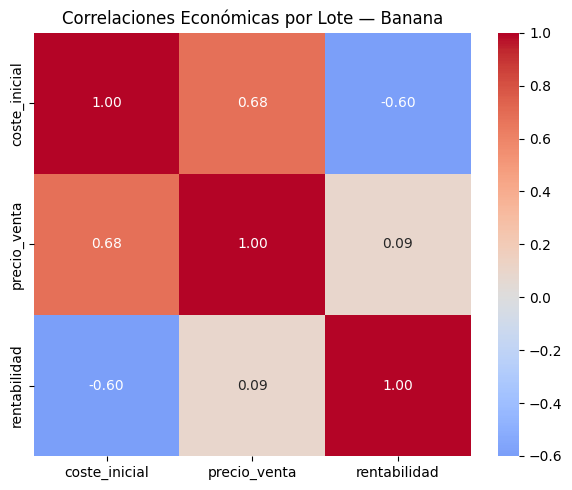

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Banana')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.684216  0.012736
coste_inicial      0.684216       1.000000  0.006172
peso               0.012736       0.006172  1.000000


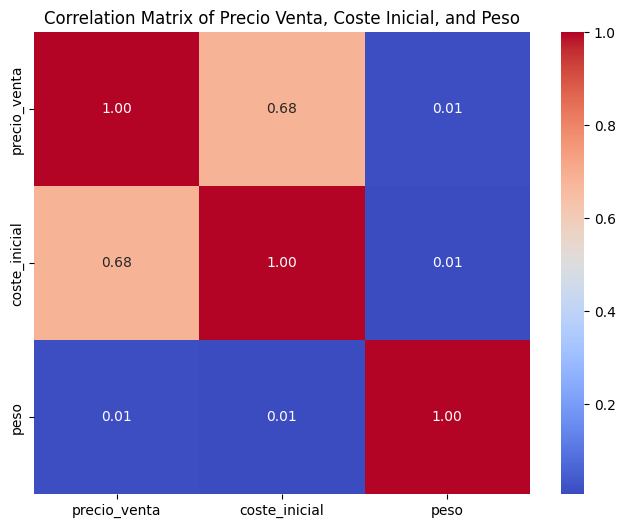

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.68 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso.
Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor.
Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de las bananas y pasamos a analizar la siguiente fruta.